# Network Science - MDS - UDD 2021

## Taller: Básicos en redes


#### Cristian Candia-Castro Vallejos, Ph.D.$^{1,2}$

- [1] Data Science Institute (IDS), Universidad del Desarrollo,Chile
- [2] Northwestern Institute on Complex Systems, Kellogg School of Management, Northwestern Unviersity, USA



# Importando Modulos Requeridos


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# default settings para plotear Redes
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

# Tipos básicos de data en NetworkX
NetworkX proporciona las siguientes clases que representan datos relacionados con la red,
así como algoritmos de análisis de red que operan en estos objetos:

**Graph**       - Grafos no dirigidos con auto-loops

**DiGraph**      - Grafos dirigidos con auto-loops

**MultiGraph**   - Grafo no-dirigidos con auto-loops y enlaces múltiples

**MultiDiGraph** - Grafos dirigidos con auto-loops y enlaces múltiples

# Comencemos 
Crea una red vacía y no-dirigida

In [3]:
G = nx.Graph()

In [4]:
G

# Nodos
Los nodos pueden ser casi cualquier cosa, incluyendo nombres, strings, coordenadas GPS, tú los nombras!

Es posible agregar nodos uno a la vez:

In [5]:
G.add_node(0)

G.add_node("Juan")

# objeto tupla representando, por ejemplo, longitud y latitud
G.add_node((1.2, 3.4))

In [6]:
G.nodes()

NodeView((0, 'Juan', (1.2, 3.4)))

... o muchos a la vez desde un contenedor de python

In [7]:
# [1,2,3] es una lista que contiene 1, 2 y 3
G.add_nodes_from([1, 2, 3,"Carlos"])

In [8]:
G.nodes()

NodeView((0, 'Juan', (1.2, 3.4), 1, 2, 3, 'Carlos'))

# Atributos de los Nodos
Los nodos pueden tener atributos arbitrarios asociados a ellos, contenidos en un diccionario string-index

Agragar atributos en el momento en que creamos un nodo usando argumentos:

In [9]:
G.add_node("Jorge", color_ojos='azules', estatura=175)

In [10]:
G.nodes(data=True)

NodeDataView({0: {}, 'Juan': {}, (1.2, 3.4): {}, 1: {}, 2: {}, 3: {}, 'Carlos': {}, 'Jorge': {'color_ojos': 'azules', 'estatura': 175}})

Tambien puedes agregar atributos a un nodo existente:

In [11]:
G.add_node("Camila")
G.nodes["Camila"]

{}

In [12]:
G.nodes["Camila"]["color_pelo"] = "rojo"
G.nodes["Camila"]["edad"] = "23"

In [13]:
G.nodes["Camila"]

{'color_pelo': 'rojo', 'edad': '23'}

In [14]:
G.nodes(data=True)

NodeDataView({0: {}, 'Juan': {}, (1.2, 3.4): {}, 1: {}, 2: {}, 3: {}, 'Carlos': {}, 'Jorge': {'color_ojos': 'azules', 'estatura': 175}, 'Camila': {'color_pelo': 'rojo', 'edad': '23'}})

G.node[n] da un diccionario que contiene todos los atributos: pares de valores asociados con el nodo n

In [15]:
print("Los ojos de Jorge son ", G.nodes["Jorge"]["color_ojos"], " y el mide ", G.nodes['Jorge']['estatura'], " centímetros.")
print("Camila tiene el cabello de color ", G.nodes["Camila"]["color_pelo"], ".")

Los ojos de Jorge son  azules  y el mide  175  centímetros.
Camila tiene el cabello de color  rojo .


# Enlaces

Un enlace entre el nodo 1 y el nodo 2 es representado por una tupla (nodo 1, nodo 2).

Ellos pueden ser agregados uno a la vez:

In [16]:
# agrega un enlace entre el nodo 0 y el nodo 1
G.add_edge(0, 1)

In [17]:
G.edges()

EdgeView([(0, 1)])

O mucho a la vez desde un contenedor:

In [18]:
edge_list = [ (2, 1), ("Jorge", "Camila"), (3, 4), ("A","B") ]

G.add_edges_from(edge_list)

In [19]:
print(G.edges())
print(G.nodes())

[(0, 1), (1, 2), (3, 4), ('Jorge', 'Camila'), ('A', 'B')]
[0, 'Juan', (1.2, 3.4), 1, 2, 3, 'Carlos', 'Jorge', 'Camila', 4, 'A', 'B']


**Nota:** Los nodos será creados automáticamente si ellos no existen aún.

# Atributos de los Enlaces

Como para los nodos, los enlaces pueden tener atributos arbitrarios. Un atributo importante y especial (para muchos algoritmos) es el "peso"

La sintaxis para agregar/accesar a los atributos de los enlaces es similar a la de los nodos:

In [20]:
G.add_edge("Jorge", "Claudia", weight=10)
G.add_edge("Jorge", "Claudia", distancia=20)

G.add_edge("Concepcion", "Santiago")

G.add_edge("Concepcion","Santiago", distancia=510)

In [21]:
print(G.edges(data=True))
print('----')
print(G.edges["Concepcion","Santiago"])

[(0, 1, {}), (1, 2, {}), (3, 4, {}), ('Jorge', 'Camila', {}), ('Jorge', 'Claudia', {'weight': 10, 'distancia': 20}), ('A', 'B', {}), ('Concepcion', 'Santiago', {'distancia': 510})]
----
{'distancia': 510}


`G.edges['node1','node2']` es un diccionario que contiene todos los atributos: pares de valores asociados con el enlace del nodo 1 al nodo 2.

# Operaciones Básicas

### Tamaño de la red

In [22]:
# Número de nodos
print(G.number_of_nodes())

# alternativa
print(len(G))

####################

# Número de enlaces
print(G.number_of_edges())

# Mejor
print(G.size())

########################
# cómo hacer formateo de strings
print("El grafo G tiene {0} nodos y {1} enlaces.".format(len(G), G.size()))

15
15
7
7
El grafo G tiene 15 nodos y 7 enlaces.


### Testeando si nodos y enlaces existen

In [23]:
G.has_node("Jorge")

True

Alternativa pythonica

In [24]:
"Claudia" in G

True

Para los enlaces, tu debes usar has_edges (no hay una sintaxisis como para nos lodos `edge in G`) =(

In [25]:
print(G.has_edge(3, 4))
print(G.has_edge("Jorge", 0))

True
False


### Encontrando los vecinos de un nodo

In [26]:
print(list(G.neighbors("Camila")))
print(list(G.neighbors(1)))

['Jorge']
[0, 2]


* En un objeto `DiGraph`, `G.neighbors(node)` entrega el nodo sucesor de `node`, como lo hace `G.successors(node)` (enlace out) 
* Predecesores de `node` pueden ser obtenidos con `G.predecessors(node)`

### Iterando sobre los nodos y enlaces
Nodos y enlaces pueden ser iterados con `G.nodes()` y `G.edges()` respectivamente.  

In [27]:
list(G.nodes(data=True))

[(0, {}),
 ('Juan', {}),
 ((1.2, 3.4), {}),
 (1, {}),
 (2, {}),
 (3, {}),
 ('Carlos', {}),
 ('Jorge', {'color_ojos': 'azules', 'estatura': 175}),
 ('Camila', {'color_pelo': 'rojo', 'edad': '23'}),
 (4, {}),
 ('A', {}),
 ('B', {}),
 ('Claudia', {}),
 ('Concepcion', {}),
 ('Santiago', {})]

In [28]:
for nodo, atributos in list(G.nodes(data=True)): # data=True incluye atributos de nodo como diccionarios
    print("Nodo {0}\t\t\t: {1}".format(nodo, atributos))

Nodo 0			: {}
Nodo Juan			: {}
Nodo (1.2, 3.4)			: {}
Nodo 1			: {}
Nodo 2			: {}
Nodo 3			: {}
Nodo Carlos			: {}
Nodo Jorge			: {'color_ojos': 'azules', 'estatura': 175}
Nodo Camila			: {'color_pelo': 'rojo', 'edad': '23'}
Nodo 4			: {}
Nodo A			: {}
Nodo B			: {}
Nodo Claudia			: {}
Nodo Concepcion			: {}
Nodo Santiago			: {}


In [29]:
list(G.edges(data=True))

[(0, 1, {}),
 (1, 2, {}),
 (3, 4, {}),
 ('Jorge', 'Camila', {}),
 ('Jorge', 'Claudia', {'weight': 10, 'distancia': 20}),
 ('A', 'B', {}),
 ('Concepcion', 'Santiago', {'distancia': 510})]

In [30]:
for n1, n2, atributo in list(G.edges(data=True)):
    print("El primer nodo {0} <----> con el nodo {1}: el atributo es {2}".format(n1, n2, atributo))

El primer nodo 0 <----> con el nodo 1: el atributo es {}
El primer nodo 1 <----> con el nodo 2: el atributo es {}
El primer nodo 3 <----> con el nodo 4: el atributo es {}
El primer nodo Jorge <----> con el nodo Camila: el atributo es {}
El primer nodo Jorge <----> con el nodo Claudia: el atributo es {'weight': 10, 'distancia': 20}
El primer nodo A <----> con el nodo B: el atributo es {}
El primer nodo Concepcion <----> con el nodo Santiago: el atributo es {'distancia': 510}


### Calculando grados

In [31]:
# one node
print(G.degree("Jorge")) # retorna un entero

# todos los nodos (retorna un diccionario con pares nodo : grado para todos los nodos)
print(G.degree())

# solo la secuencia de grados
print(list(dict(G.degree()).values()))

2
[(0, 1), ('Juan', 0), ((1.2, 3.4), 0), (1, 2), (2, 1), (3, 1), ('Carlos', 0), ('Jorge', 2), ('Camila', 1), (4, 1), ('A', 1), ('B', 1), ('Claudia', 1), ('Concepcion', 1), ('Santiago', 1)]
[1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1]


Como sabes, en un grafo dirigido (de clase `DiGraph`) hay dos tipos de grados. Las cosas funcionan tal cual como tu lo esperas:
* `G.in_degree(node) `
* `G.out_degree(node) # igual que G.degree()`


# Otras operaciones

* ***`subgraph(G, nbunch)` or `G.subgraph(nbunch)`***       
subgrafo de G inducido por los nodos en nbunch    

* ***`reverse(G)`***       
DiGraph con enlaces al revés

* ***`union(G1, G2)`***      
unión de grafos

* ***`disjoint_union(G1, G2)`***     
Igual, pero con trata a los nodos de G1 y G2 como distintos

* ***`intersection(G1, G2)`***      
grafo con solo los enlaces en común entre G1 y G2

* ***`difference(G1, G2)`***      
grafo con solo los enlaces G1 que no estan en G2

* ***`copy(G)` or `G.copy()`***     
copia de G

* ***`complement(G)` or `G.complement()`***     
El complemento del grafo G

* ***`convert_to_undirected(G)` or `G.to_undirected()`***     
versión no-dirigida de G (un grafo o multigrafo)

* ***`convert_to_directed(G)` or `G.to_directed()`***      
versión dirigida de G (un digrafo o multigrafo)

* ***`adjacency_matrix(G)`***      
Matriz de adjacencia A del grafo G (en formato de matriz sparse; para obtener la matriz completa (con las entradas iguales a cero, usa A.toarray() )

# Graph I/O

Habitualmente, tú no construiras una red desde cero, un nodo link a la vez. Por el contrario, tú querras leer un la red desde un archivo. NetworkX puede entender los siguientes formatos de grafos:

* edge lists
* adjacency lists
* GML
* GEXF
* Python 'pickle'
* GraphML
* Pajek
* LEDA
* YAML

# Comencemos: Leyendo un edge list
Coloca el archivo `test.txt` en tu directorio de trabajo para IPython.
Si no sabes el directorio de trabajo puedes accederlo tecleando
`%pwd`

en cualquier celda

In [32]:
%pwd

'C:\\Users\\pablo\\OneDrive\\Documentos\\GitHub\\MDS-Notebooks\\03-CdR\\Taller 1 Redes'

Lee en el archivo con las siguientes opciones:
* Lineas que comienzan con `#` son tratadas como comentarios e ignoradas
* Usa un objeto `Graph` para almacenar la data (si la red es no-dirigida)  
* La data es separada por espacios blancos (' ')
* Los nodos deberían ser tratados como enteros (`int`)
* El encoding del texto of the text file containing the edge list is utf-8

In [33]:
# lee una edge list desde el archivo'test.txt'
G = nx.read_edgelist('./test.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Formatos permitidos
* Pares de nodos sin data
`1 2`
* Pares de nodos con un diccionario de python
`1 2 {weight:7, color:"verde"}`

In [51]:
G.info()

AttributeError: 'Graph' object has no attribute 'info'

# Análisis Básico
Un gran número de análisis básicos pueden ser hechos en una linea usando NetworkX (en general usamos `nx` como alias) + numpy (en general usamos `np` como alias) o funciones de python como `min`, `max`, etc.

In [35]:
N = len(G)
L = G.size()
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

In [36]:
#degrees

In [37]:
print("Número de nodos: ", N)
print("Número de enlaces: ", L)
print('-------')
print("Grado promedio: ", 2*L/N) #Formula vista en clases (qué sucedía con las redes reales?)
print("Grado promedio (alternativa de calculo)", np.mean(degrees))
print('-------')
print("Grado mínimo: ", kmin)
print("Grado máximo: ", kmax)

Número de nodos:  443
Número de enlaces:  540
-------
Grado promedio:  2.4379232505643342
Grado promedio (alternativa de calculo) 2.4379232505643342
-------
Grado mínimo:  1
Grado máximo:  8


# Ploteando la red
* NetworkX puede dibujar redes usando un gran número de algoritmos de "layout" (diseño)
* Los resultados no son tan bonitos como en Gephi, pero NetworkX es mejor para una visualización rápida y no muy pulcra y entrega un control fino sobre el diseño.

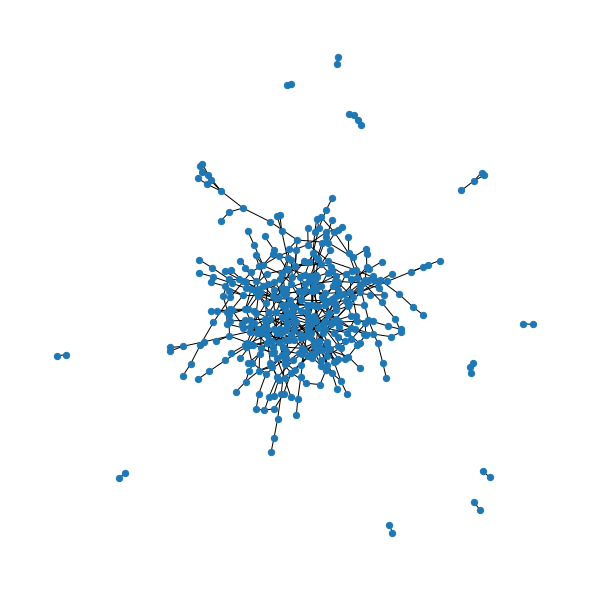

In [38]:
# Usando el algoritmo force-based o "spring" 
fig = plt.figure(figsize=(8,8))


nx.draw_spring(G, node_size=40)

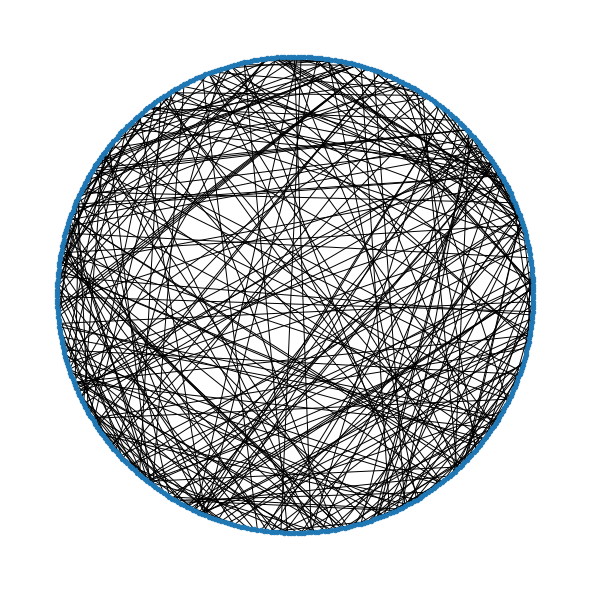

In [39]:
# usando el algoritmo circular 
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=20)

# Ploteando la distribución de grados

Vamos a plotearla en escala logaritmica primero (IMPORTANTE!!!!!)

`numpy` puede ser usado para tener bines logaritmicamente espaciados entre el grado mínimo y el grado máximo.

In [40]:
kmax

8

In [41]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

In [42]:
bin_edges

array([1.        , 1.11565792, 1.24469259, 1.38865114, 1.54925964,
       1.72844379, 1.928352  , 2.15138117, 2.40020544, 2.6778082 ,
       2.98751792, 3.33304803, 3.71854142, 4.14862018, 4.62844095,
       5.16375679, 5.76098615, 6.42728981, 7.17065677, 8.        ])

In [43]:
np.histogram(degrees, bins=bin_edges, density=True)

(array([2.21045056, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.55205633, 0.        , 0.        , 0.        ,
        0.64822688, 0.        , 0.22620291, 0.        , 0.09720654,
        0.        , 0.02716411, 0.00913052, 0.        ]),
 array([1.        , 1.11565792, 1.24469259, 1.38865114, 1.54925964,
        1.72844379, 1.928352  , 2.15138117, 2.40020544, 2.6778082 ,
        2.98751792, 3.33304803, 3.71854142, 4.14862018, 4.62844095,
        5.16375679, 5.76098615, 6.42728981, 7.17065677, 8.        ]))

Ahora lo graficamos!

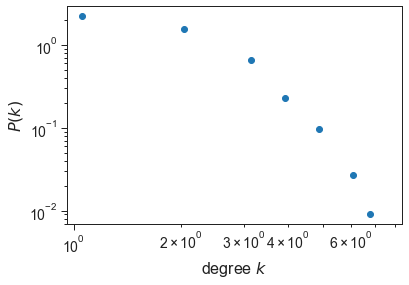

In [44]:
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# # remuevo los limites derecho y superior 
# ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')

# Muestra la gráfica
plt.show()

Esto claramente no es una red con algo así como una distribución de grado de ley de potencia o de cola pesada 
También vamos a graficarla en escala lineal.

El comando `linspace` de `numpy` se usa para obtener números linealmente espaciados entre dos extremos.

In [45]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

Ahora lo graficamos!

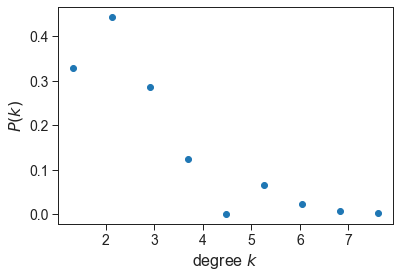

In [46]:
fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto meido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


# Muestra la gráfica
plt.show()

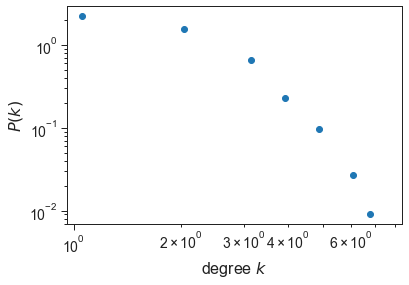

In [47]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# # remuevo los limites derecho y superior 
# ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')

# Muestra la gráfica
plt.show()

# Tarea

Juntense en grupos. Tienen una semana para entregar esta tarea. Para ambos datasets `example_1.txt` y `example_2.txt`. Cada grupo deberá cargar el edge list que corresponde y hacer lo siguiente:

* Pregunta 1: Calcula todas las medidas básicas que se muestran arriba. Comente ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

* Pregunta 2: Graficar la distribución del grado en escala log-log. También graficarlo en escala lineal. Comente cómo encaja esto con el análisis de la pregunta 1.

* Pregunta 3: Dibuje la red utilizando los dos algoritmos de diseño que se muestran arriba. ¿Cómo se refljan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

*Nota: Recuerden que SU interpretación de los resultados es lo más importante.*